In [3]:
%pylab inline

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


##### датасет для задачи регрессии Boston Housing, 

##### необходимо предсказать стоимость дома по 13 признакам.

In [4]:
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [5]:
print(data.DESCR[:1500])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
df['DIS']

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
5      6.0622
6      5.5605
7      5.9505
8      6.0821
9      6.5921
10     6.3467
11     6.2267
12     5.4509
13     4.7075
14     4.4619
15     4.4986
16     4.4986
17     4.2579
18     3.7965
19     3.7965
20     3.7979
21     4.0123
22     3.9769
23     4.0952
24     4.3996
25     4.4546
26     4.6820
27     4.4534
28     4.4547
29     4.2390
        ...  
476    2.3053
477    2.1007
478    2.1705
479    1.9512
480    3.4242
481    3.3317
482    3.4106
483    4.0983
484    3.7240
485    3.9917
486    3.5459
487    3.1523
488    1.8209
489    1.7554
490    1.8226
491    1.8681
492    2.1099
493    2.3817
494    2.3817
495    2.7986
496    2.7986
497    2.8927
498    2.4091
499    2.3999
500    2.4982
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64

In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

____________

##### 1. Исследовать данные. (1 балл)

нарисовать 13 картинок, которые покажут зависимость целевой переменной (таргета, игрека, y) от каждого из признаков.

Hint. используйте https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

In [10]:
import matplotlib.pyplot as plt

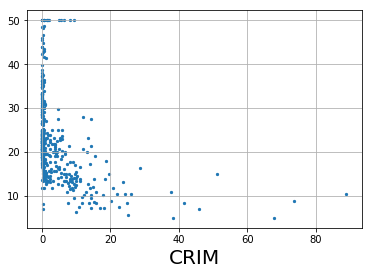

In [11]:
plt.scatter(df.CRIM,y, 5)
plt.xlabel('CRIM', fontsize = 20)
plt.grid(True)

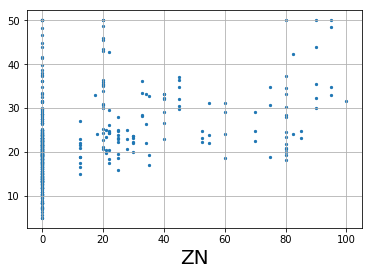

In [12]:
plt.scatter(df.ZN ,y, 5)
plt.xlabel('ZN', fontsize = 20)
plt.grid(True)

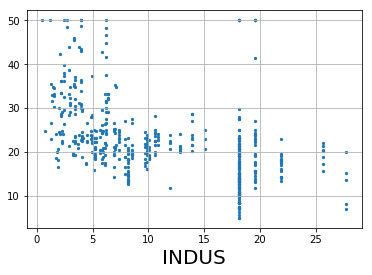

In [13]:
plt.scatter(df.INDUS,y, 5)
plt.xlabel('INDUS', fontsize = 20)
plt.grid(True)

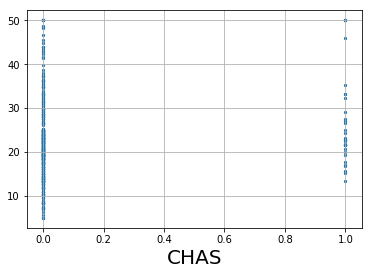

In [14]:
plt.scatter(df.CHAS,y, 5)
plt.xlabel('CHAS', fontsize = 20)
plt.grid(True)

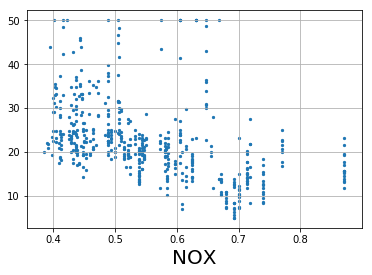

In [15]:
plt.scatter(df.NOX,y, 5)
plt.xlabel('NOX', fontsize = 20)
plt.grid(True)

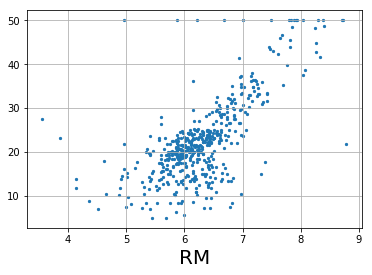

In [16]:
plt.scatter(df.RM ,y, 5)
plt.xlabel('RM', fontsize = 20)
plt.grid(True)

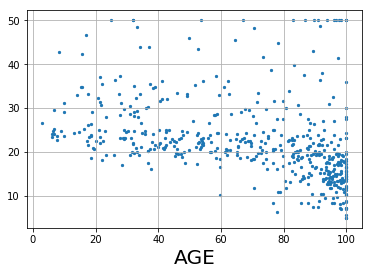

In [17]:
plt.scatter(df.AGE,y, 5)
plt.xlabel('AGE', fontsize = 20)
plt.grid(True)

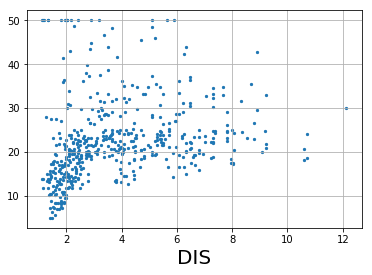

In [18]:
plt.scatter(df.DIS ,y, 5)
plt.xlabel('DIS', fontsize = 20)
plt.grid(True)

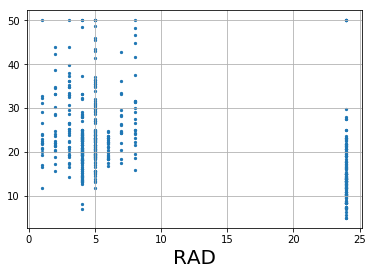

In [19]:
plt.scatter(df.RAD ,y, 5)
plt.xlabel('RAD', fontsize = 20)
plt.grid(True)

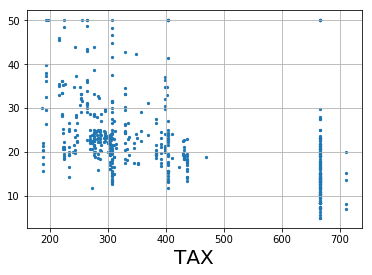

In [20]:
plt.scatter(df.TAX,y, 5)
plt.xlabel('TAX', fontsize = 20)
plt.grid(True)

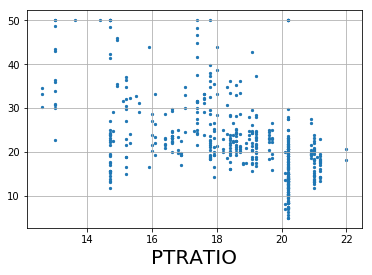

In [21]:
plt.scatter(df.PTRATIO,y, 5)
plt.xlabel('PTRATIO', fontsize = 20)
plt.grid(True)

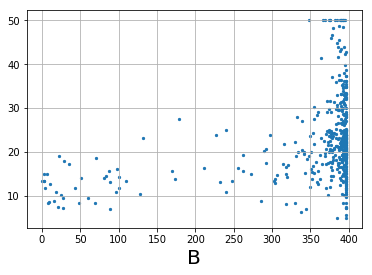

In [22]:
plt.scatter(df.B,y, 5)
plt.xlabel('B', fontsize = 20)
plt.grid(True)

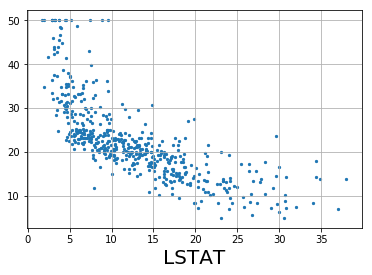

In [23]:
plt.scatter(df.LSTAT,y, 5)
plt.xlabel('LSTAT', fontsize = 20)
plt.grid(True)

##### 2. Обучить регрессию. (1 балл)

Обучите любую линейную регрессию из sklearn. Померить качество на тестовой части по метрикам RMSE, R2.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.2, random_state=42)
# не меняйте рандом стейт! - он поможет сделать вычисления воспроизводимыми

In [25]:
len(X_test)

102

In [26]:
len(X_train)

404

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [31]:
y_pred

array([29.00108503, 36.03180934, 14.82255381, 25.03889584, 18.7617758 ,
       23.25843874, 17.66106325, 14.33486047, 23.01572366, 20.63232475,
       24.9137504 , 18.63823843, -6.10459473, 21.76184921, 19.24273449,
       26.18610963, 20.65093389,  5.7909294 , 40.49699449, 17.60897981,
       27.25209766, 30.06900481, 11.33334531, 24.15971925, 17.85047566,
       15.83640193, 22.79011378, 14.52979672, 22.44033031, 19.19711348,
       22.43960684, 25.22165436, 25.9398993 , 17.70193922, 16.75888473,
       16.93845627, 31.23575474, 20.13234607, 23.76792503, 24.63508868,
       13.9401346 , 32.25447524, 42.66822383, 17.33169518, 27.27926004,
       16.99194395, 14.06522394, 25.90637789, 20.29329067, 29.95832098,
       21.29199886, 34.34691795, 16.0430061 , 26.22572769, 39.53953019,
       22.57770989, 18.83929963, 32.72589656, 25.06908102, 12.88408119,
       22.67630131, 30.476643  , 31.5279363 , 15.89284854, 20.21760093,
       16.71531932, 20.51914955, 25.96660508, 30.6169449 , 11.55

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(4.930661915979792, 0.6684825753971582)

In [33]:
r2_score(y_test, y_pred)

0.6684825753971582

##### 3. Сделайте крутую фичу. (1 балл)

Вернитесь к скатерплотам. Если вы правильно все построили - то вы увидите что один из признаков (LSTAT) как то зависит от y. Сделайте спрямляющее преобразование (добавьте новый признак) и обучите регрессию и померийте снова качество по метрикам RMSE, R2. если все сделали правильно, то кажется что оно должно вырасти

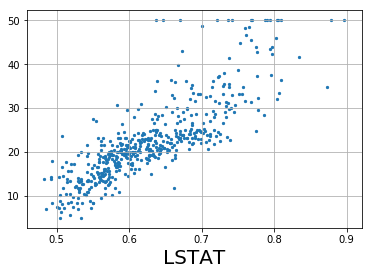

In [34]:
plt.scatter(df.LSTAT**(-0.2) ,y, 5)
plt.xlabel('LSTAT', fontsize = 20)
plt.grid(True)

In [35]:
df.LSTAT[400]

26.77

In [36]:
X_newtrain = X_train.copy()
print(info(X_newtrain))
print(X_newtrain[range(len(X_newtrain)),12])

class:  ndarray
shape:  (404, 13)
strides:  (104, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1d1582e06e0
byteorder:  little
byteswap:  False
type: float64
None
[24.91  8.47  7.83 23.29 11.28  5.08  8.01  5.77 26.45 19.78  6.75  9.45
  6.36 15.17  7.56 16.51 12.01  6.36 12.5   5.9  20.62 10.3   5.81  7.7
  6.36  4.82 15.02  3.76 27.26  7.34 13.04 17.09 28.32 12.03  8.51  3.95
  4.38 16.3  14.67  4.97 10.24 23.98 27.38 10.59 15.12 19.52 19.88  4.63
 16.22 16.44  5.21 12.04 10.21  6.58 18.13  7.79  2.94 22.98 13.15 13.15
 13.    6.87 10.45 11.98  5.91 18.03 14.81 19.15 13.35 12.27  8.77  4.59
 14.36 15.37 10.45  5.33  2.87  7.73 29.29 34.77 24.56 17.6   4.16  9.71
 17.44 34.41  3.73  8.1  14.19 11.1  15.1  16.35 26.77  5.03  6.56 15.55
 15.02 27.8   8.16 12.12  9.93  6.93  7.51  9.52  9.81  3.32  4.56  5.25
  6.78  5.98 18.13  3.54 13.61  7.85  8.67 10.42 13.27 19.77  3.92  7.26
  4.73 28.28 18.68 11.41  4.08 18.46  3.26 10.15  7.14 23.69  9.22 10.16


In [37]:
X_newtrain = X_train.copy()
X_newtest = X_test.copy()
for i in range(len(X_newtrain)):
    X_newtrain[i,12] = X_newtrain[i,12]**(-0.2)
print(X_newtrain[range(len(X_newtrain)),12])

    

[0.5256846  0.65226386 0.66259423 0.53280231 0.61593968 0.72248238
 0.65958914 0.70431159 0.51941545 0.55049673 0.6825575  0.63813658
 0.69073041 0.58050088 0.66726084 0.57075613 0.608263   0.69073041
 0.60341763 0.70118013 0.54593667 0.62723828 0.70333912 0.6648166
 0.69073041 0.73011386 0.58165573 0.76729511 0.51629133 0.67121366
 0.5983351  0.56682838 0.51236724 0.60806062 0.65164953 0.75976727
 0.74422658 0.57221927 0.58440507 0.72565254 0.62797161 0.52970023
 0.51583798 0.62376472 0.5808843  0.55195546 0.54994179 0.73601015
 0.57278262 0.57124135 0.71884036 0.60795957 0.62834021 0.6860485
 0.56017076 0.66327329 0.80599163 0.53423212 0.59733072 0.59733072
 0.59870286 0.68015619 0.62542717 0.60856733 0.70094268 0.56079077
 0.58329599 0.55407205 0.59553014 0.60566306 0.64773905 0.7372885
 0.58690676 0.57898222 0.62542717 0.71557401 0.80988549 0.66429977
 0.50892774 0.49176664 0.52717442 0.5635046  0.75193679 0.63468196
 0.56453478 0.49279134 0.76852541 0.65811683 0.58830633 0.6179244

In [38]:
for i in range(len(X_newtest)):
    X_newtest[i,12] = X_newtest[i,12]**(-0.2)

In [39]:
regressor = LinearRegression()

In [40]:
regressor.fit(X_newtrain, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_pred = regressor.predict(X_newtest)

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(4.271882317391866, 0.7511518191588558)

> добейтесь качества по R2

- 0.751


##### 4. задание про кросс-валидацию 

выберите оптимальный параметр регуляризации на ridge с помощью кросс-валидации на трейне. померийте качество на тесте. Увеличелось ли оно на метриках?

In [43]:
from sklearn import datasets, linear_model, cross_validation
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [44]:
for alpha in [0.01, 0.05, 0.1, 1.0]:
    regr = linear_model.Ridge(alpha=alpha)
    regr.fit(X_newtrain, y_train)
    s = cross_val_score(regr, X_newtrain, y_train, cv = 5)
    print(alpha, s.mean())

0.01 0.7769840459147973
0.05 0.7766241495071455
0.1 0.775342595358161
1.0 0.7355324426965847


In [45]:
regr = linear_model.Ridge(alpha=0.01)
regr.fit(X_newtrain, y_train)
y_pred = regr.predict(X_newtest)
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(4.2774271002953945, 0.7505054040599302)

##### 5. задание про пайплайн

Используйте Pipeline из пакета sklearn.
сделайте поиск по параметрам (GridSearch), автоматически выберете какой способ нормировки признаков (минмакс скейлинг, стандарт скейлер) работает лучше, добавьте полиномиальных признаков, автоматически выберите модель (ридж лассо или просто регрессия) и регуляризацию к ней (если нужно).

In [51]:
pipeline = Pipeline([
    ('first', MinMaxScaler()),
    ('second', PolynomialFeatures()),
    ('third', LinearRegression())])

parameters = [{
    'first':[StandardScaler(),MinMaxScaler()],
    'third':[Lasso(),Ridge()],
    'third__alpha':[0.01, 0.05, 0.1, 1]}]


In [52]:
gs = GridSearchCV(pipeline, param_grid = parameters)
gs.fit(X_newtrain,y_train)
gs.best_params_
y_pred = gs.predict(X_newtest)
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

C:\Users\Artyom\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Artyom\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Artyom\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Artyom\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

(3.7283763870703504, 0.810444928863499)

> добейтесь качества по R2

- 0.811
